# Problem 2

In this Jupyter notebook, we visualize how HMMs work. This visualization corresponds to problem 2 in set 6.

Assuming your HMM module is complete and saved at the correct location, you can simply run all cells in the notebook without modification.

In [18]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    sample_sonnet,
    visualize_sparsities,
    animate_emission
)

## Visualization of the dataset

We will be using the Constitution as our dataset. First, we visualize the entirety of the Constitution as a wordcloud:

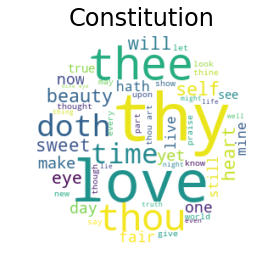

In [19]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare_filt_1.txt')).read()
wordcloud = text_to_wordcloud(text, title='Constitution')

## Training an HMM

Now we train an HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [20]:
obs, obs_map = parse_observations(text)
hmm8 = unsupervised_HMM(obs, 10, 100)

## Part G: Visualization of the sparsities of A and O

We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. What patterns do you notice?

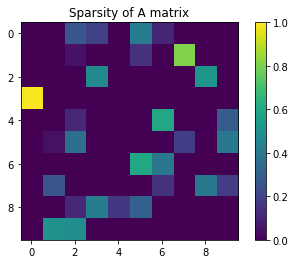

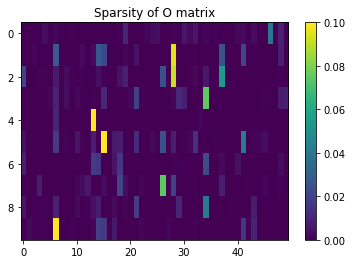

In [21]:
visualize_sparsities(hmm8, O_max_cols=50)

## Generating a sample sentence

As you have already seen, an HMM can be used to generate sample sequences based on the given dataset. Run the cell below to show a sample sentence based on the Constitution.

In [22]:
print('Sample Sentence:\n====================')
print(sample_sonnet(hmm8, obs_map, n_words=8))

Sample Sentence:
Wilt decay powerful thought substance of thou trophies
Sweetest are as by lies hearts thee will
More abuses i cries so me speak do
Votary tell done unrespected to gift their hooks
He and the do i tomb to the
Not thee love end trim not gainst my
Dost hold being lie much of i so
By heavenly pace becomes boast of beauty meetness
And added he praise therein this desperate corrupt
Bounty meant more this time through do saw
Beauty of to my bare doth transgression deserving
True me both threw giving keeps my state
He i we me hand that the by
Others and jealousy second convertest and being should



## Part H: Using varying numbers of hidden states

Using different numbers of hidden states can lead to different behaviours in the HMMs. Below, we train several HMMs with 1, 2, 4, and 16 hidden states, respectively. What do you notice about their emissions? How do these emissions compare to the emission above?

In [23]:
hmm1 = unsupervised_HMM(obs, 1, 100)
print('\nSample Sentence:\n====================')
print(sample_sonnet(hmm1, obs_map, n_words=25))


Sample Sentence:
Thus now a on duteous sworn too thou with shall lines i growth my what winters eye skill hateth living till patience care elsewhere doing
Joy pattern for not but this for with see report nor is other do hers wide old ere is ten would inviting spend niggarding grow
Verse mayst is my in these knowledge let and decay wealth which by free being make brand my i a world mind lovely art in
You alone in a soul as me so than then dates of of thought mine whose face him odour love whilst my me the but
Temptation that give wires wealth the well any in deserving yet their him thou that lusty common bred evil can summer to thou wherefore of
Plagues i though so that my my sweet rage waves follow of yet that was and slanderers his day heart like of heavy lies sin
Too thee were rare prize bequest i and no worthy sad abuse you so thou thee appeal thy were strong i my told how eyes
Coral of love thou the less such refined removed man this work which your fading thing beloved a your spo

In [24]:
hmm2 = unsupervised_HMM(obs, 2, 100)
print('\nSample Sentence:\n====================')
print(sample_sonnet(hmm2, obs_map, n_words=25))


Sample Sentence:
Leave sour buried onward and than thou grant i with night they thou their i can here being in i not of things and saith
Of pluck seem dead remembered thy think should tis love eyes what white thee of of hath a sounds where before uprear that for thou
Beshrew he is is weep from removed hold as but and the and put stars and these to eclipses gentle seem is of from self
Passion my with brag sweet thoughts story thee delight far thing then ranks will one from now with look part back with leap thee are
They eyes his know fair loves doth unfolding eye my in yet did clouds is it bring she my poets of thinks time love have
Doth wind new every great hath abuse thy more on i engrafted filled be grant down that when it thee to semblance are in wires
Sad world leaves and is feeding pride ah thy my self action many rain dignifies half on not in in some heard thy a jade
Do some nor saying loss your theres greet thy do the to know loud wasteful i spoils since such my do blame name m

In [25]:
hmm4 = unsupervised_HMM(obs, 4, 100)
print('\nSample Sentence:\n====================')
print(sample_sonnet(hmm4, obs_map, n_words=25))


Sample Sentence:
Antique love in clouds for summers proud nor richproud wish as suffer wrecked fair i shows my my pitiful you in my wilfully to her
Which their vanished that joy to rude best me thou self holds extreme writes swerving your when ride for it me time can from have
Thought translate mayst temptation wherever friend do greater where lies worth for my canst doth die says that churl their is my each never friend
Thy i that inconstant beauty is my that strength humble sickness right natures idle on this as by adverse blind might be lord lose full
Far my amiss of wouldst name to but as is sets when this thou he glory sire ambush of the a all counterfeit the precious
Dwell beauty lines slumbers to cold expiate on day be amends to the thy you beauty to an hope you could subjects some and oft
Time can that heart in up steel seen they in thy thine should jealous force she thou me thievish nor delighted thine would love are
I with whom when thou his advised of sable life bosom enter

In [26]:
hmm16 = unsupervised_HMM(obs, 16, 100)
print('\nSample Sentence:\n====================')
print(sample_sonnet(hmm16, obs_map, n_words=25))


Sample Sentence:
Down worst your owners for and far rearward blessed long be most up being not sicken unknown praising dead beauty decay me correction fits his
And antique of my pitch now seen where such lost but love for thee large not do to view sealed this and speed sweetest better
Doom was day as be bliss that shows brain when art art when askance decay smell and it so so against ever thou semblance you
In the time dost summers that i lend hang hell in score time to not hoisted say thy parts with not from tincture days amends
The thou so book saturn will with me that with sit thus churls keeps makes show thou doth hath wars of worth wardrobe to enjoyer
Trespass as grey lose wishing of suffer provide some loves in sacred anger and receivest not like anger moan are worth and do love kept
The praises on costs thoughts is were neer only which were and my couplement on endeared of those lease that your view bell the self
Stoln delight if time the memory painted fresh what praises are b

## Part I: Visualizing the wordcloud of each state

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

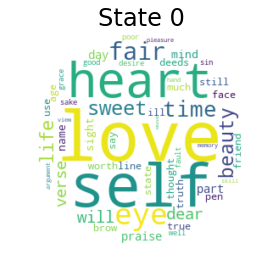

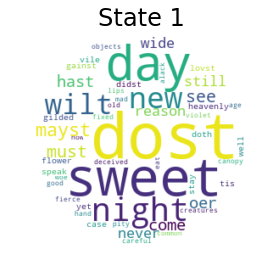

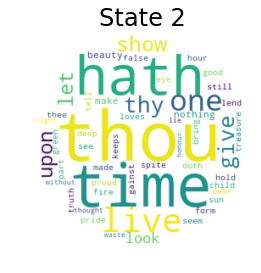

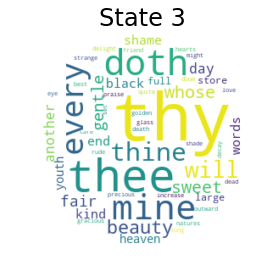

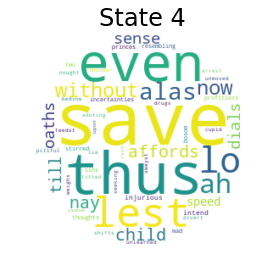

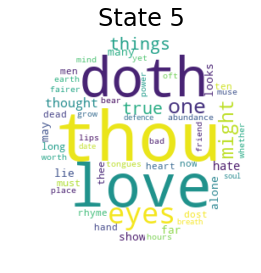

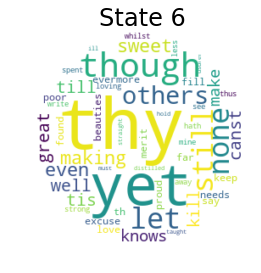

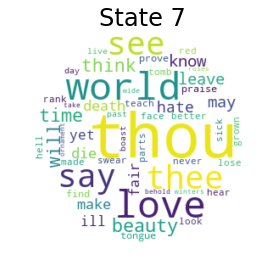

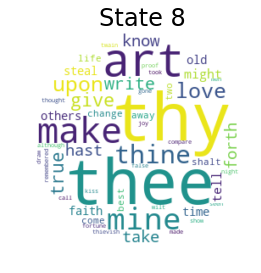

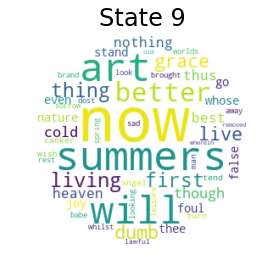

In [27]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

## Visualizing the process of an HMM generating an emission

The visualization below shows how an HMM generates an emission. Each state is shown as a wordcloud on the plot, and transition probabilities between the states are shown as arrows. The darker an arrow, the higher the transition probability.

At every frame, a transition is taken and an observation is emitted from the new state. A red arrow indicates that the transition was just taken. If a transition stays at the same state, it is represented as an arrowhead on top of that state.

Use fullscreen for a better view of the process.

C:\Users\jennie\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "



Animating...


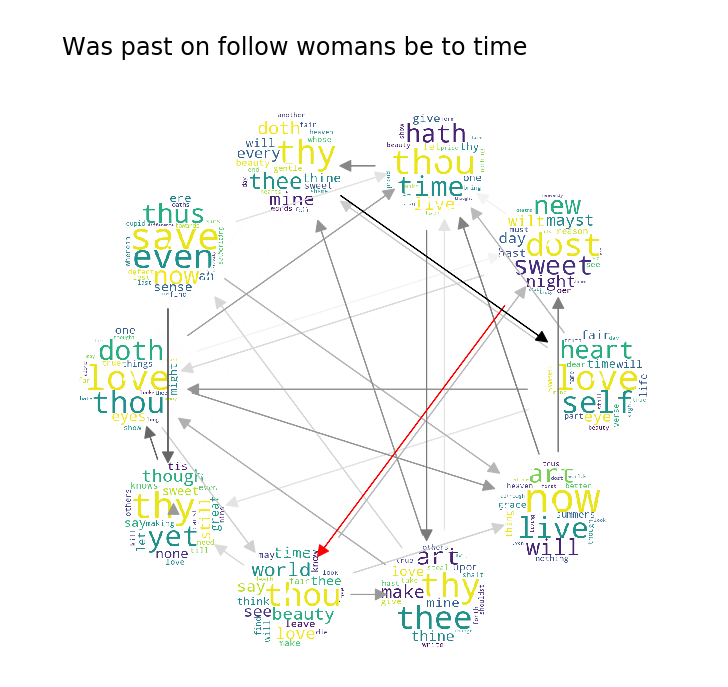

In [28]:
anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())